In this Project, we will use condominium sales data from all five boroughs of New York City:

* Bronx
* Brooklyn
* Manhattan
* Staten Island
* Queens

This diagram shows the location of the five boroughs:

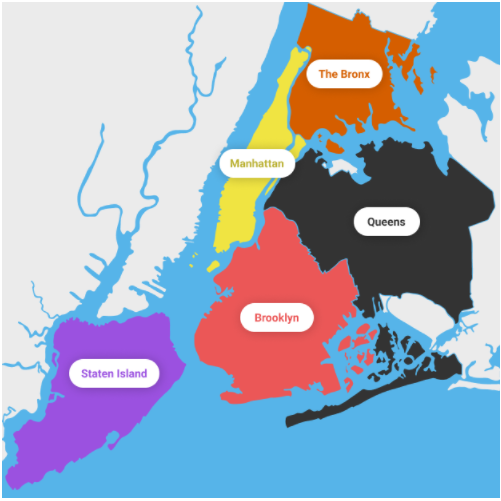

The purpose of this Project is to explore the following questions:

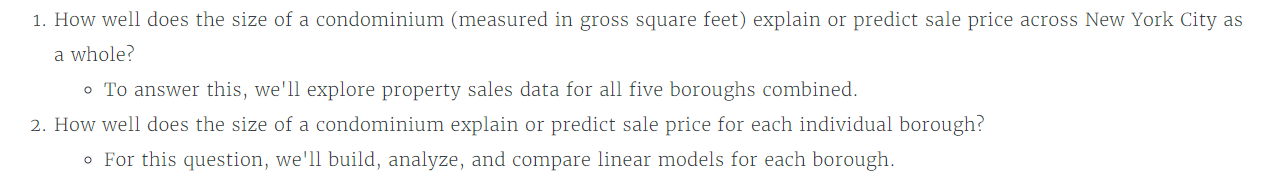

Along the way, we'll also see how erroneous sale price entries influence our models, and we will devise methods to remove problematic entries.

[Solution](https://github.com/dataquestio/solutions/blob/master/Mission459Solutions.Rmd)

We will use condominium sales data from all five boroughs of New York City. The datasets are publicly available [here](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page).

We developed this Project in November 2019. The datasets contain property sales records from the previous year (12 months). The solutions contains results based on sales records from November 1, 2018, through October 31, 2019. We encourage to work on latest version of the property sales data and prepare the data for analysis, but if we'd like to work with the dataset we prepared, we can download it [here](https://data.world/dataquest/nyc-property-sales-data).

**Important Note** As of July, 2020, `gross_square_feet` data is not being collected and/or recorded for the building class `R4`, "condominiums with elevators". Presumably this is due to the ongoing Covid-19 pandemic. 

If we choose to complete a unique project with the latest data, we encourage  to select a `building_class_at_time_of_sale` that includes data for `sale_price` and `gross_square_feet`.

Run below command to view the most popular [building classifications](https://www1.nyc.gov/assets/finance/jump/hlpbldgcode.html) that include data for `sale_price` and `gross_square_feet`:

`sort(table(NYC_property_sales$building_class_at_present))`

**Task**

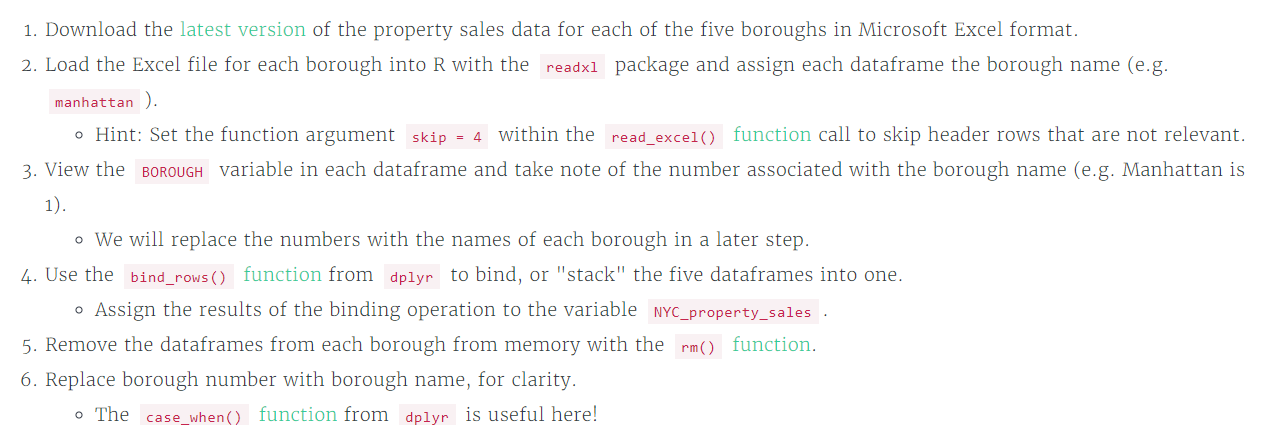

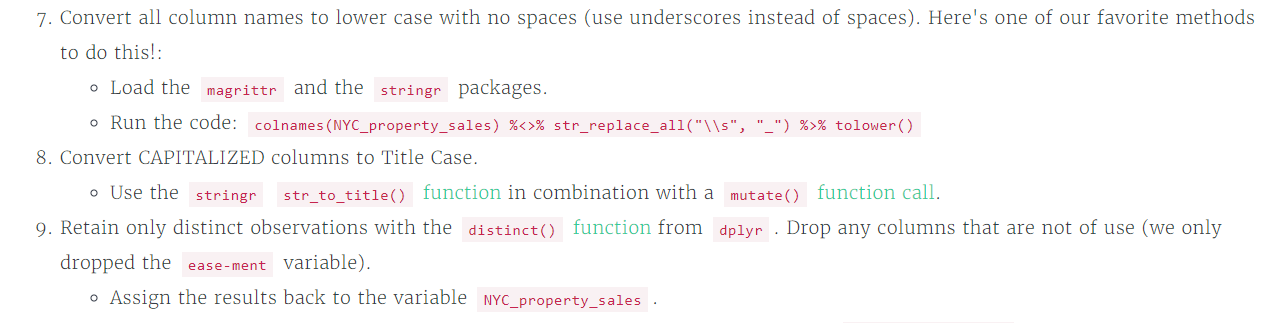

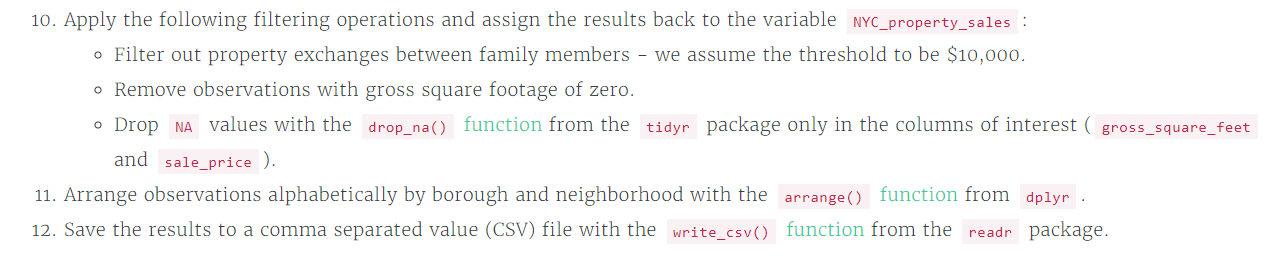

**Answer**

### Understanding the Data

The data used for this project originates from five separate Microsoft Excel files, one for each borough in New York City. The data structure is identical for all five files, which makes it possible to combine all of the data into a single file. The programming steps below outline the steps taken to load each dataset into R, combine the datasets, format the data to facilitate ease of use, and export the dataset as a csv file for later use. Because we are predicting sale price on the basis of size, we deleted sale records with a `sale_price` less than \$10,000 (we assumed these deals to be between family members), and deleted `gross_square_feet` values of 0.

It's useful to generate scatterplots to visualize the data relationships between pairs of data. When we visualize bivariate relationships, the independent variable is plotted on the x-axis, and the dependent variable is plotted on the y-axis. When we generate a scatterplot to explore bivariate relationships, we can evaluate the relationships between the variables by examining the following characteristics: direction, linearity, and strength. 

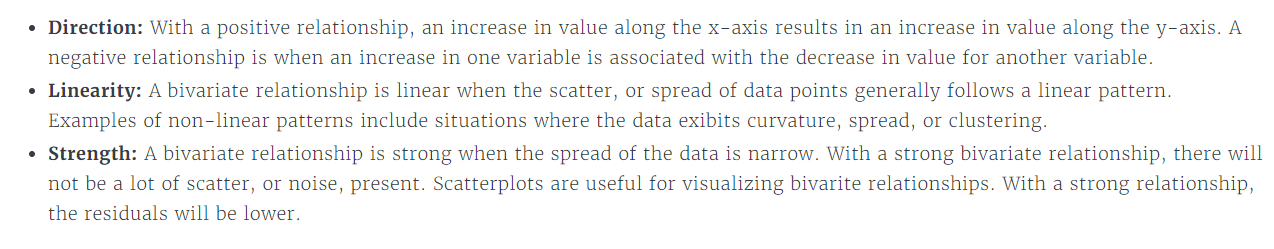

For the next step, generate scatterplots to visualize `sale_price` versus `gross_square_feet`. Visualize this for all sale records combined. Also, facet the plots by borough to visualize the spread of data for each borough individually.

**Task**

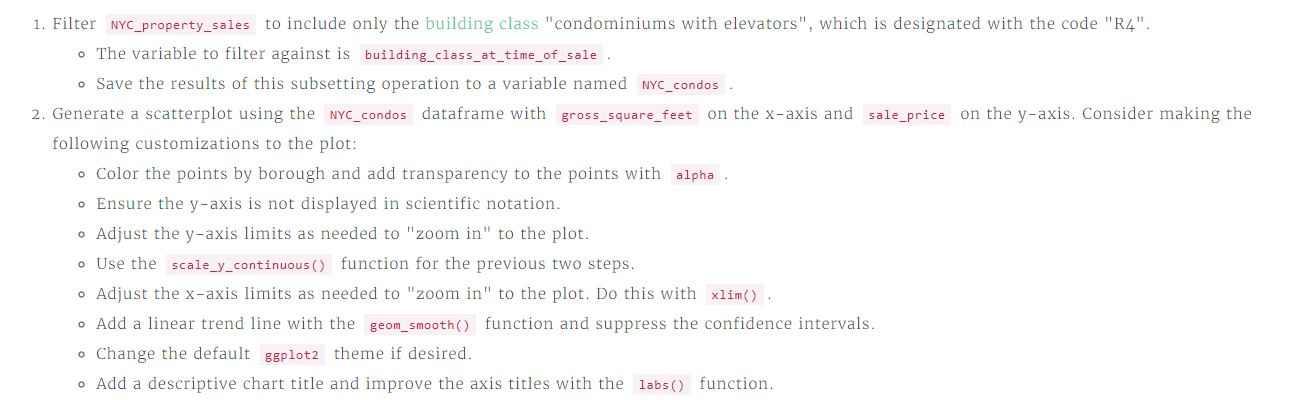

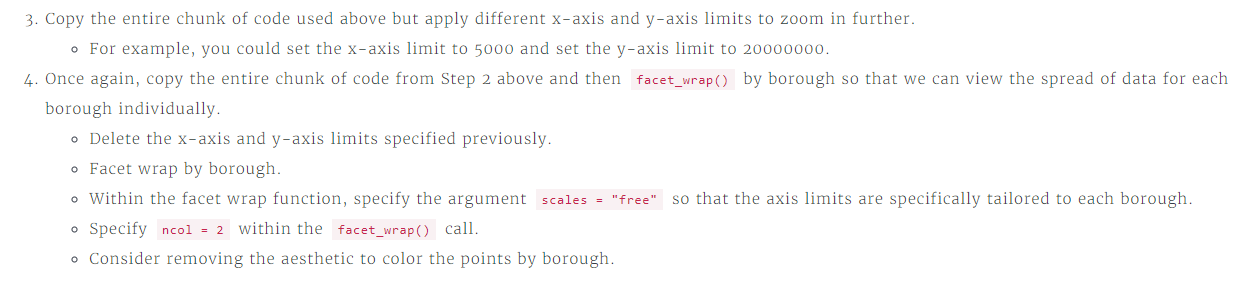

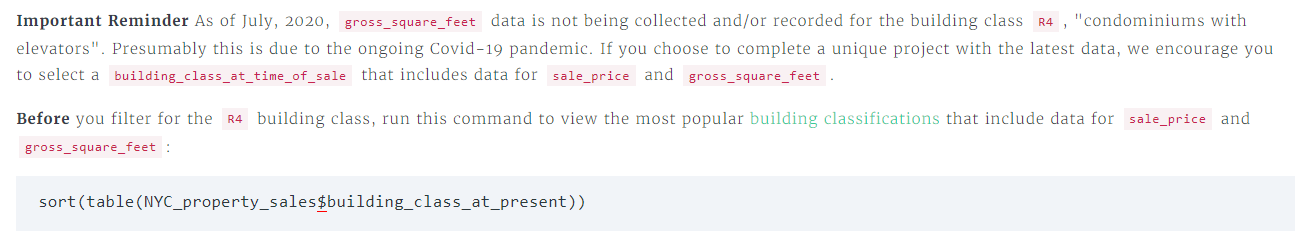

**Answer**

The `readr` package is loaded so that the csv file can be read into R.

The scatterplots generated above all show that `sale_price` generally increases as `gross_square_feet` increases. However, there are a few outliers worth investigating because outliers can impact model quality, especially when the outlier represents erroneous data. We'll want to remove erroneous data points before building regression models!

Let's discuss outliers as we look at the faceted plot we generated. Remember, it's okay if our plot differs from this. The main thing we are concerned with is visualizing the direction, linearity, and strength of the data. Let's begin with Manhattan.

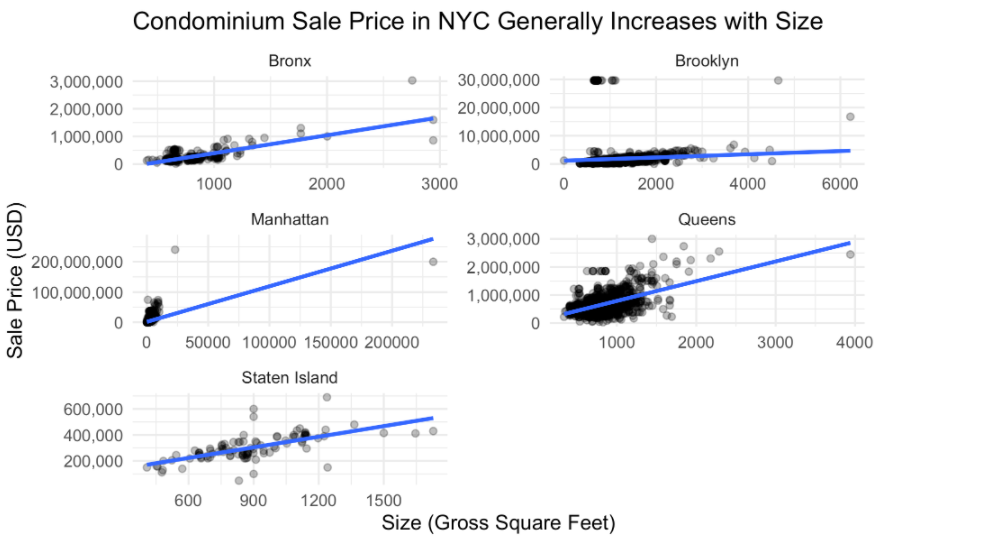

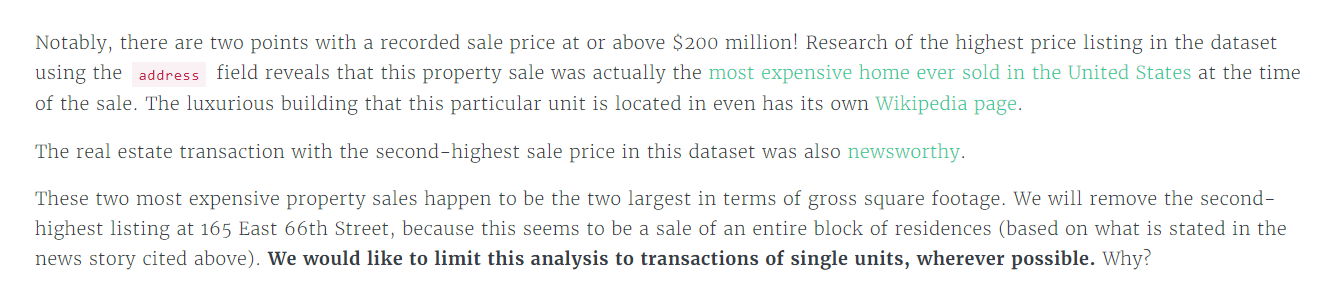

One common data integrity issue with real estate datasets is that sometimes, when multiple units are purchased in a single transaction, or purchase deal, the total sale price for all combined units is recorded for each individual sale record. For example, suppose a real estate investor purchases 10 condominiums at once for a price of `$100,000` each, and a grand total of `$1,000,000`. It is common in this case that all 10 transactions record a sale price of `$1,000,000`, not `$100,000`! This grossly misrepresents the true cost of each unit and can impact modeling results.

Do we notice any outliers, or groups of outliers, worth investigating for any other boroughs? The scatterplot for the Brooklyn borough stood out to us. In particular, the cluster of outliers with a recorded sale price of around `$30` million. 

Why are these data points suspicious? There are a number of sale records at a sale price of around `$30` million, but there is only a single observation in the range of `$10` to `$30` million. Could there really be numerous condominium sales at a `sale_price` so far outside the spread of the other data points? We'll investigate this next.

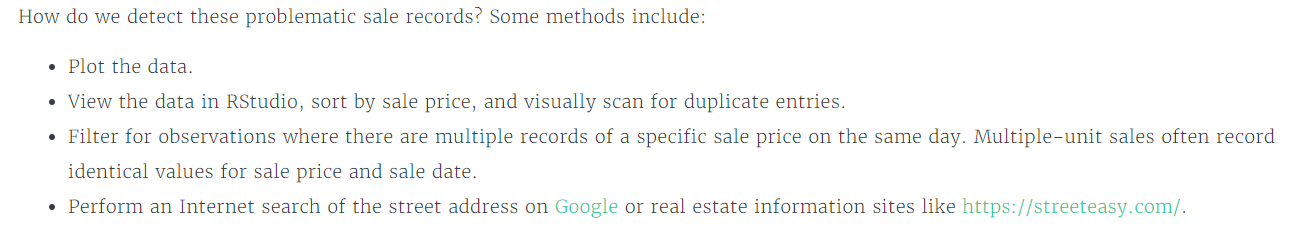

The NYC_condos` dataset contains around 8,000 observations, so we don't want to search every address in the dataframe! Instead, we want to focus Internet inquiries to specific outliers such as the specific properties in Brooklyn we have discussed.

We also want to use our programming skills to filter for sale records where there are multiple entries. One method for surfacing these types of sale records is to filter for observations with the same `sale_date` and `sale_price`. 

We'll provide the `dplyr` code here because we have not learned this specific approach yet. We may notice it is very similar to the `group_by()` and `summarize()` workflow.

We can use the [`n()` function](https://dplyr.tidyverse.org/reference/n.html) within a [`filter()` function](https://dplyr.tidyverse.org/reference/filter.html) call to isolate observations with three or more matches of `sale_date` and `sale_price`, like this:

`multi_unit_sales <- NYC_condos %>% 
  group_by(sale_price, sale_date) %>% 
  filter(n() >= 3) %>% 
  arrange(desc(sale_price))`

The result is a subset of the original `NYC_condos` dataframe that includes potential multi-unit sales. Our choice of three-or-more matches was somewhat arbitrary. We encourage to build our own filter that best isolates multi-unit sales. We searched most of the addresses in the dataframe returned above and confirmed that the sale prices represent multi-unit sales, not the true price per unit!

In this step of the project we will use the methods mentioned above to identify and remove from the `NYC_condos` dataframe multi-unit sales that misrepresent sale price.

**Task**

For this step in the Project, remove multi-unit sales that misrepresent sale price and save the results back to `NYC_condos`. But before we alter the dataframe make a copy of `NYC_condos` as `NYC_condos_original`, or similar.

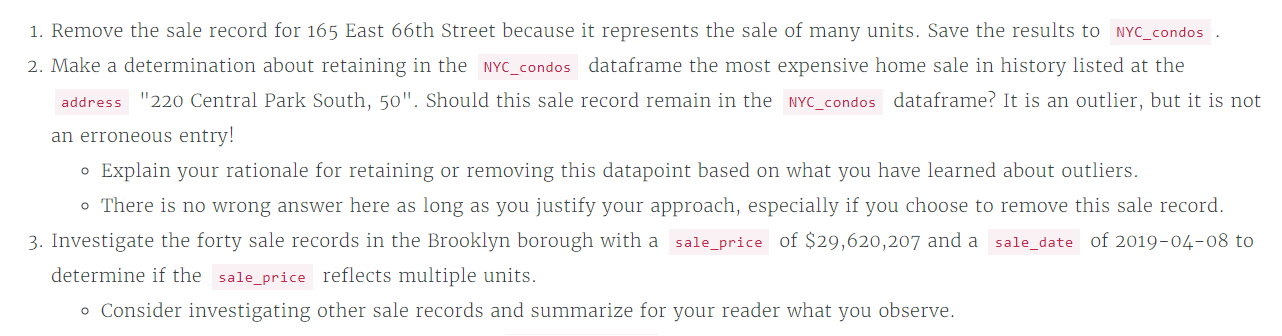

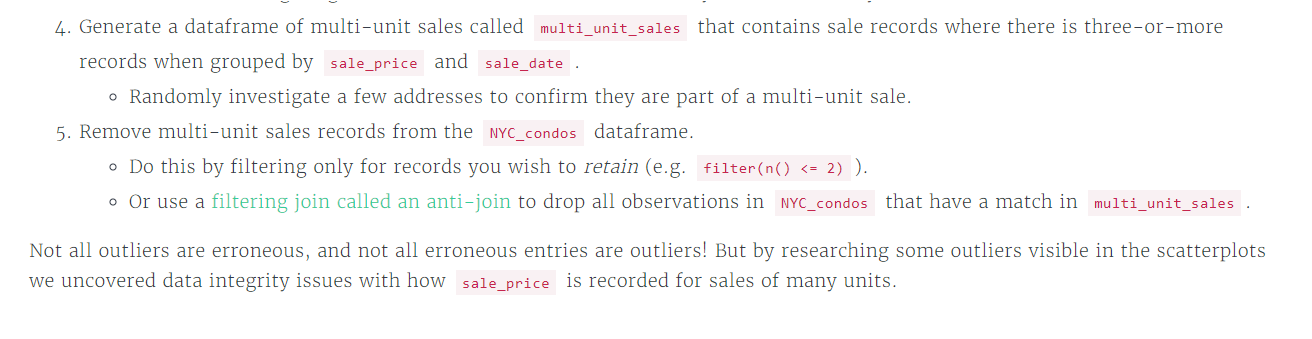

**Answer**

###### Outliers and Data Integrity Issues

We begin our investigation of outliers by sorting all sale records by sale price, from high to low.


Research of the highest price listing in the dataset reveals that this property sale was actually the [most expensive home ever sold in the United States](https://www.6sqft.com/billionaire-ken-griffin-buys-238m-nyc-penthouse-the-most-expensive-home-sold-in-the-u-s/) at the time of the sale. The luxurious building that this particular unit is located in even has its own [Wikipedia page](https://en.wikipedia.org/wiki/220_Central_Park_South). 

The real estate transaction with the second-highest sale price in this dataset was also [news worthy](https://therealdeal.com/2019/04/12/cim-group-acquires-resi-portion-of-ues-luxury-rental-for-200m/).

These two most expensive property sales also happen to be the two largest in terms of gross square footage. We will remove the second-highest listing at 165 East 66th Street because this transaction looks to be for an entire block of residences. We would like to limit this analysis to transactions of single units, if possible.

Thanks to the internet it does not take long for us to find [information about this new building](https://streeteasy.com/building/554-4-avenue-brooklyn). Sure enough, this building contains 40 total units. But according to the website, the average price *per unit* for the 26 "active sales" is around `\$990,000` and the average price for the 14 previous sales is around `\$816,000`, per unit. 

For our purposes we will remove all 40 observations from the dataset because sale prices for each unit are erroneous. We could consider other ways of correcting the data. One option is to determine the price-per-square-foot by dividing the `$29M` sale price by the total number of square feet sold across all 40 units, and then using this number to assign a price to each unit based on its size. But that is not worth our time and we can't be certain that method would yield valid results. 

Fortunately, we have a programmatic option for surfacing potential multi-unit sales where each sale record contains the sale price for the entire real estate deal, not the price for the individual unit. Below we build a grouped filter that returns all sale records with three or more observations that have the same sale price and sale date. In general, multi-unit sales contain the same price and sale date across many sale records. When building a grouped filter we want to be careful not to "over-filter" by making the criteria too specific. In our case it looks like the filter effectively surfaces multi-sale transactions using only two grouping parameters: `sale_price` and `sale_date`.  



We researched many of the addresses listed in the `multi-unit-sales` dataframe and confirmed that most of the sale records included here are part of a multi-unit transaction. We do not expect this filter to be 100 percent accurate, for example there may be a few property sales included here that are not part of a multi-unit sale. But overall, this grouped filter appears to be effective. 

There are many ways to remove the multi-unit sales from the `NYC_condos` dataframe. Below are two identical methods: (1) filter for only the sale records we wish to *retain* that have two or less instances of `sale_price` and `sale_date`, or (2) use an anti-join to drop all records from `NYC_condos` found in `multi_unit_sales`. 

So far, we've taken many steps to clean the dataset, but we haven't modeled anything yet! This situation is very common with data analysis and data science. It's rare to find a dataset that is ready to analyze or model. And even if a dataset appears ready to use, there may be other data integrity issues that need to be addressed, such as removing multi-unit sales like we did in the last step.

Were our efforts to remove multi-unit sales worthwhile? Will this improve the accuracy of our linear regression models moving forward? Let's find out! To see this we'll generate bivariate linear regression models for all New York City boroughs combined. 

In later exercises we'll build many linear models to compare results across boroughs. But for now let's stay focused on whether removing multi-unit sales improves model accuracy for sale_price explained by gross_square_feet for condominium sales in New York City as a whole.

**Task**

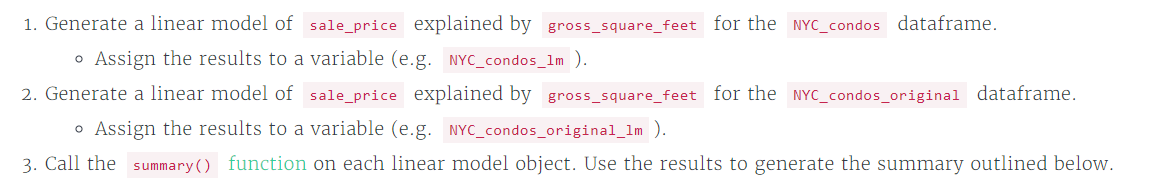

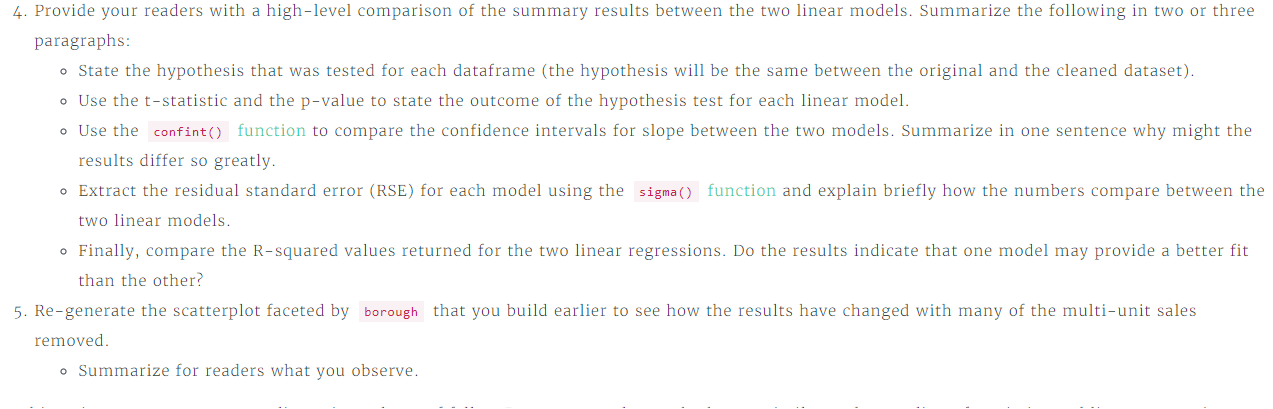

For an added challenge, consider writing our results for an audience with no knowledge of statistics or linear modeling. In the workplace we often have to present the same information to different audiences with varying degrees of technical and non-technical knowledge. As the presenter, it is important to clearly communicate key findings.

**Answer**

###### Linear Regression Model for Boroughs in New York City Combined

Now that we've removed many multi-unit sales from the dataset, let's generate a linear regression model for all New York City neighborhoods combined. As a reminder, we are predicting `sale_price` on the basis of `gross_square_feet`.


How does this compare to the `NYC_condos_original` dataframe that includes multi-unit sales? 

##### Comparison of linear modeling results

A bivariate linear regression of `sale_price` (price) explained by `gross_square_feet` (size) was performed on two different datasets containing condominium sale records for New York City. One dataset, `NYC_condos`, was cleaned to remove multi-unit sale records (where the same sale price is recorded for many units). The other dataset, `NYC_condos_original`, remained unaltered and contained all original sale records. In each case, the hypothesis is that  there is a relationship between the size of a condominium (`gross_square_feet`) and the price (`sale_price`). We can declare there is a relationship between condominium size and price when the slope is sufficiently far from zero. 

For each model, the t-statistic was high enough, and the p-value was low enough, to declare that there is, in fact, a relationship between `gross_square_feet` and `sale_price`. The t-statistic for the cleaned dataset (`NYC_condos`) was nearly double that of the original dataset (`NYC_condos_original`) at 113.04 versus 61.39. In each case the p-value was well below the 0.05 cutoff for significance meaning that it is extremely unlikely that the relationship between condominium size and sale price is due to random chance. 

The confidence interval for the slope is [4384.254, 4538.999] for the `NYC_condos` dataset compared to only [1154.636, 1230.802] for the `NYC_condos_original` dataset. This difference can likely be attributed to the removal of many multi-million dollar sale records for smaller units which impacted price predictions in the original dataset. The measure for *lack of fit*, or residual standard error (RSE) was lower for the cleaned dataset at 2,945,000 compared to 4,745,000 for the original dataset. However, it must be noted that the `NYC_condos` is smaller than the `NYC_condos_original` by 150 observations. Finally, the R-squared, or the proportion of the variability in `sale_price` that can be explained by `gross_square_feet` is 0.6166 for the cleaned `NYC_condos`. This is nearly double the R-squared value estimated for the `NYC_condos_original` dataset at 0.3177. 

Below is the updated scatterplot that uses the cleaned `NYC_condos` data. For the Brooklyn borough we are better able to see the spread of the data and how the trend line fits the data because we removed the `\$30` million outliers. The same is true for the Manhattan borough because the $200 million multi-unit sale was removed.


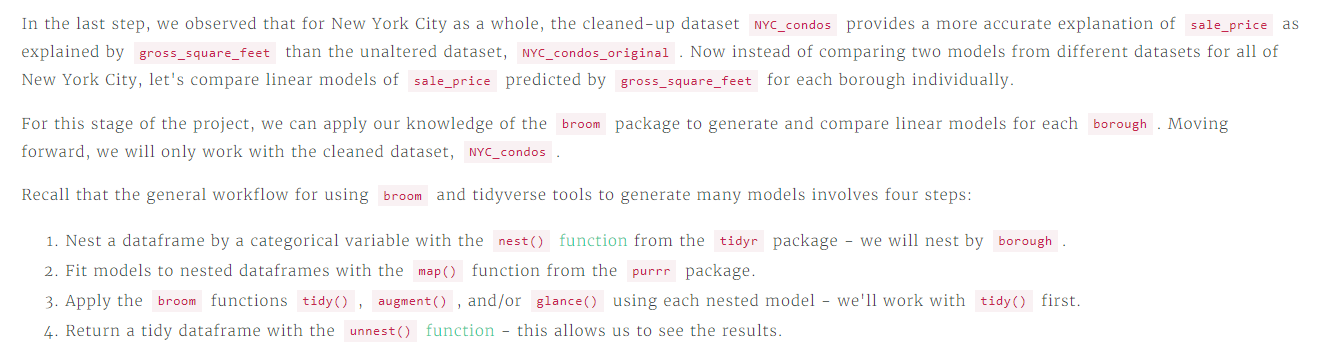

For this exercise, apply the broom workflow specified above to the `NYC_condos` dataframe by generating coefficient estimates with confidence intervals for each borough in New York City.

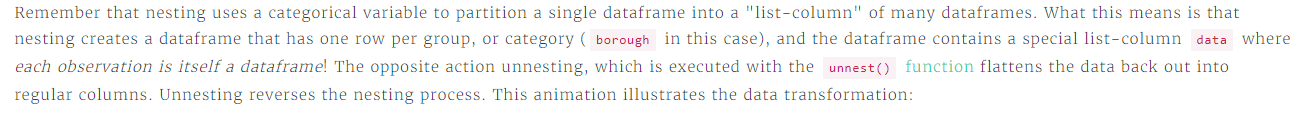

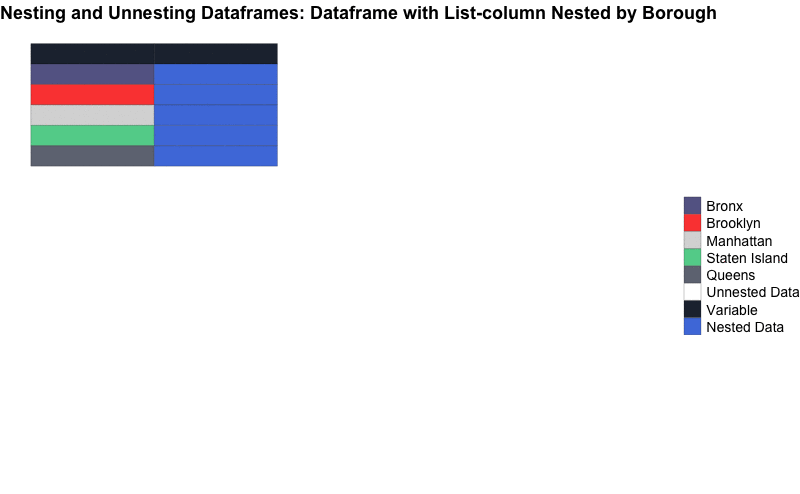

In [1]:
from IPython.display import Image

Image("unnest_animate.gif")

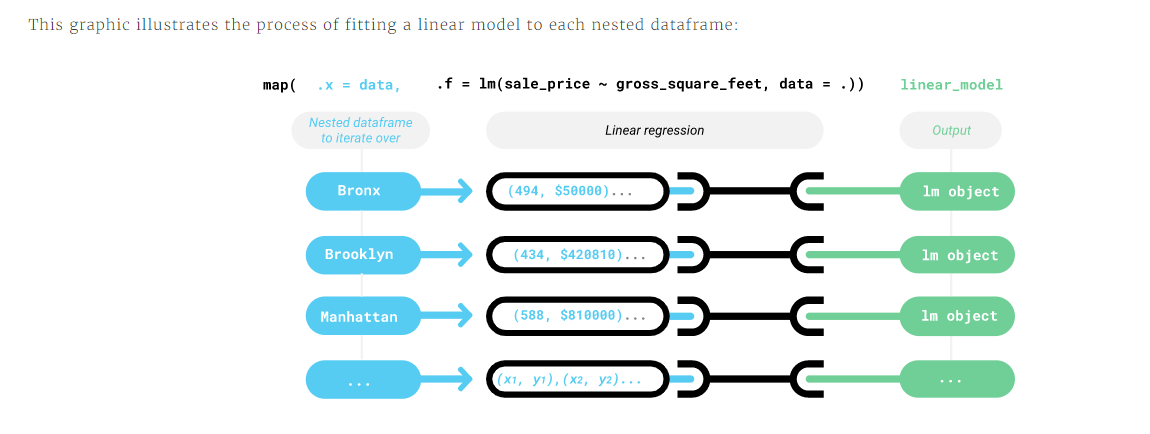

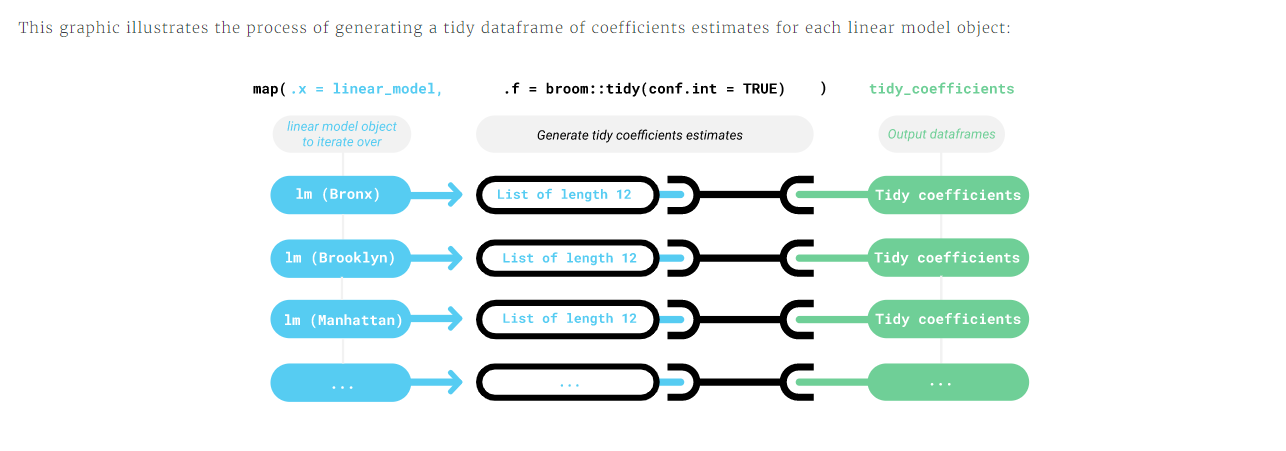

Ideally, our data structure will look something like this after following the first three steps outlined above:

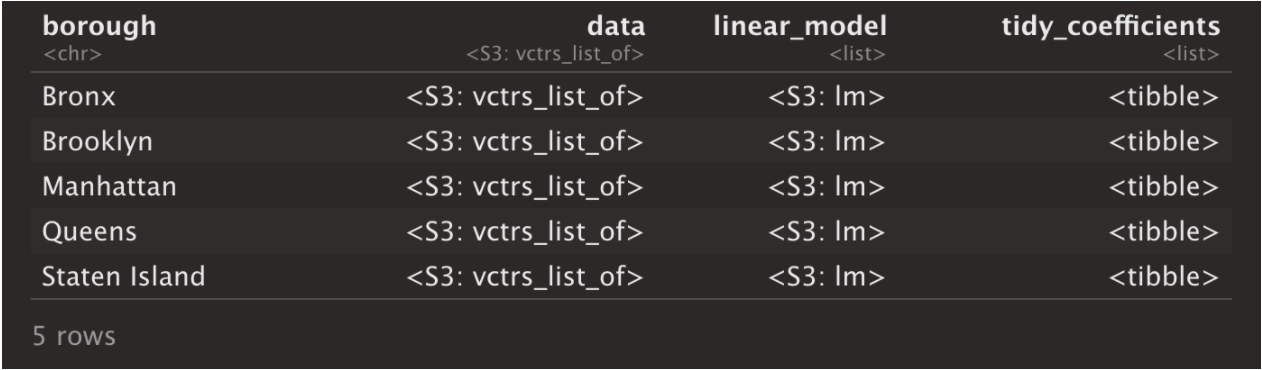

**Task**

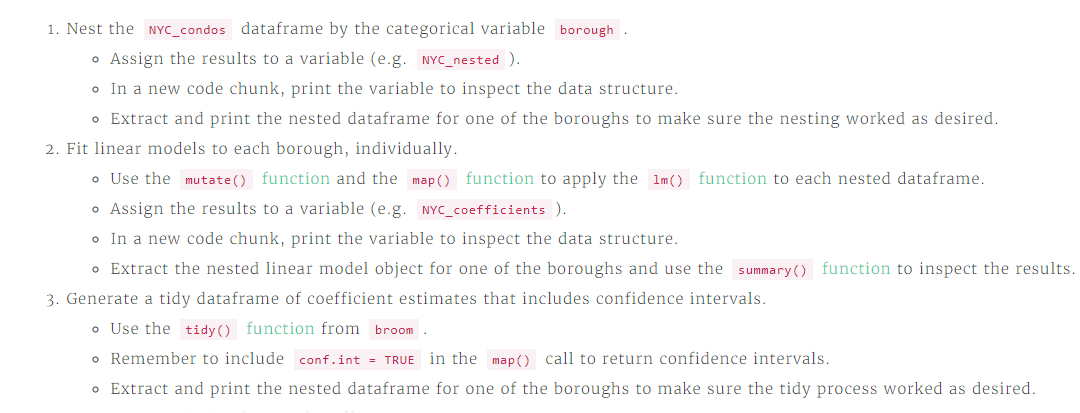

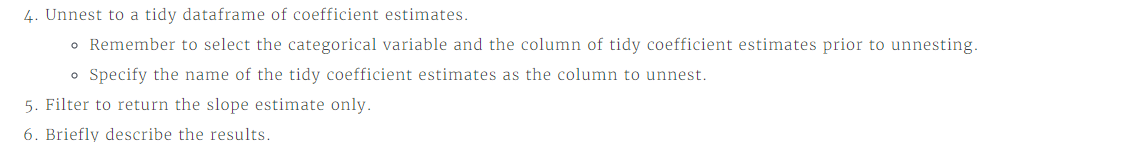

**Answer**

###### Linear Regression Models for each Borough - Coefficient Estimates

Now let's apply the `broom` workflow to compare coefficient estimates across the five boroughs. The general workflow using broom and tidyverse tools to generate many models involves 4 steps:

1. Nest a dataframe by a categorical variable with the `nest()` function from the `tidyr` package - we will nest by `borough`.
2. Fit models to nested dataframes with the `map()` function from the `purrr` package.
3. Apply the `broom` functions `tidy()`, `augment()`, and/or `glance()` using each nested model - we'll work with `tidy()` first.
4. Return a tidy dataframe with the `unnest()` function - this allows us to see the results.


In the previous step, the `NYC_condos` dataframe was collapsed from 7,946 observations to only 5. The nesting process isolated the sale records for each borough into separate dataframes. 

The next step in the process is to fit a linear model to each individual dataframe. What this means is that we are generating separate linear models for each borough individually.

Taking a look at the data structure we see that we have a new list-column called `linear_model` that contains a linear model object for each borough.

We can view the linear modeling results for any one of the nested objects using the `summary()` function. Below are the linear regression statistics for Manhattan.


A quick look at the R-squared value for the Manhattan linear model indicates that `gross_square_feet` looks to be a fairly good single predictor of `sale_price`. Almost two-thirds of the variability with `sale_price` is explained by `gross_square_feet`.

The next step is to transform these linear model summary statistics into a tidy format.

Now we have a new variable called `tidy_coefficients` that contains tidy coefficient estimates for each of the five boroughs. These tidy statistics are currently stored in five separate dataframes. Below are the coefficient estimates for Manhattan.

Now we can unnest the `tidy_coefficients` variable into a single dataframe that includes coefficient estimates for each of New York City's five boroughs. 



We're mainly interested in the slope which explains the change in y (sale price) for each unit change in x (square footage). We can filter for the slope estimate only as follows.


We've arranged the results in ascending order by the slope estimate. For each of the five boroughs, the t-statistic and p-value indicate that there is a relationship between `sale_price` and `gross_square_feet`. 

In Staten Island, an increase in square footage by one unit is estimated to increase the sale price by about `\$288`, on average. In contrast, an increase in total square footage by one unit is estimated to result in an increase in sale price of about `\$4,728`, on average.

Using the results from the previous exercise we can infer that, in general, a condominium in Staten Island will cost less per square foot than in Manhattan. Or to be more precise, an increase in size will cost less per square foot in Staten Island than Manhattan.

For this exercise, apply the `broom` workflow used in the previous exercise to generate a tidy dataframe of regression summary statistics for each borough in New York City.

This graphic illustrates the process of generating a tidy dataframe of regression summary statistics for each linear model object:

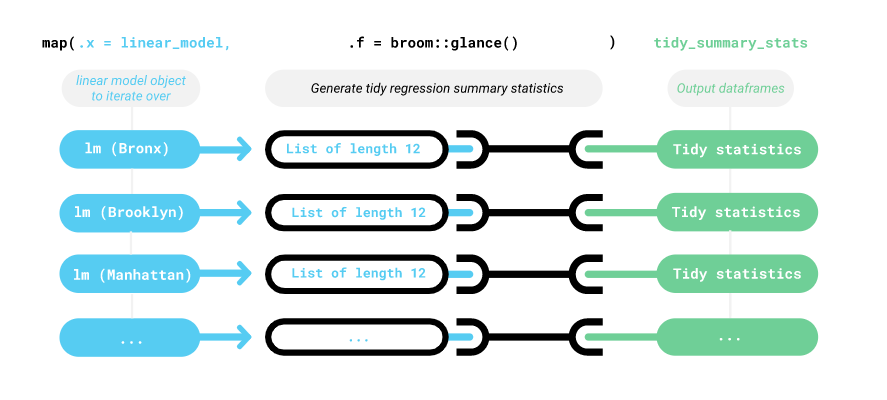

**Task**

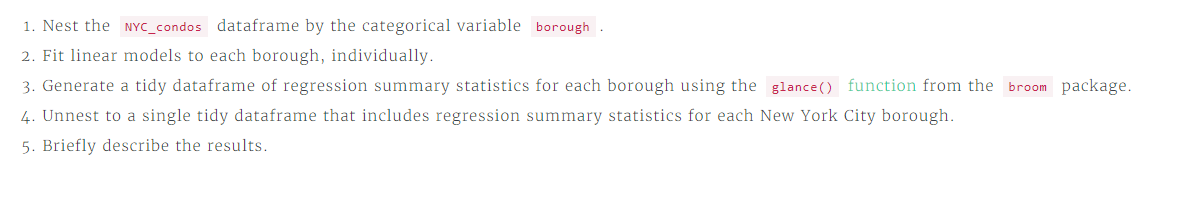

**Answer**

###### Linear Regression Models for each Borough - Regression Summary Statistics

Now we will apply the same workflow using `broom` tools to generate tidy regression summary statistics for each of the five boroughs. Below we follow the same process as we saw previously with the `tidy()` function, but instead we use the `glance()` function.

Now we have a new variable called `tidy_summary_stats` that contains tidy regression summary statistics for each of the five boroughs in New York City. These tidy statistics are currently stored in five separate dataframes. Below we unnest the five dataframes to a single, tidy dataframe arranged by R-squared value.


These results will be summarized in our conclusion paragraph below. 

# Conclusion

Our analysis showed that, in general, the `gross_square_feet` variable is useful for explaining, or estimating, `sale_price` for condominiums in New York City. We observed that removing multi-unit sales from the dataset increased model accuracy. With linear models generated for New York City as a whole, and with linear models generated for each borough individually, we observed in all cases that the t-statistic was high enough, and the p-value was low enough, to declare that there is a relationship between `gross_square_feet` and `sale_price`.

For the linear models that we generated for each individual borough, we observed a wide range in slope estimates. The slope estimate for Manhattan was much higher than the estimate for any of the other boroughs. We did not remove the record-setting \$240 million property sale from the dataset, but future analysis should investigate the impacts that this single listing has on modeling results. 

Finally, regression summary statistics indicate that `gross_square_feet` is a better single predictor of `sale_price` in some boroughs versus others. For example, the R-squared value was estimated at approximately 0.63 in Manhattan, and 0.59 in Brooklyn, compared to an estimate of only 0.35 in Queens. These differences in R-squared correspond with the scatterplots generated for each borough; the strength of sale prices versus gross square feet was higher, and the dispersion (spread), was lower for Manhattan and Brooklyn as compared to Queens where the relationship was noticeably weaker because the data was more spread out.



These are a few next steps to consider if we'd like to continue this Project on your own:

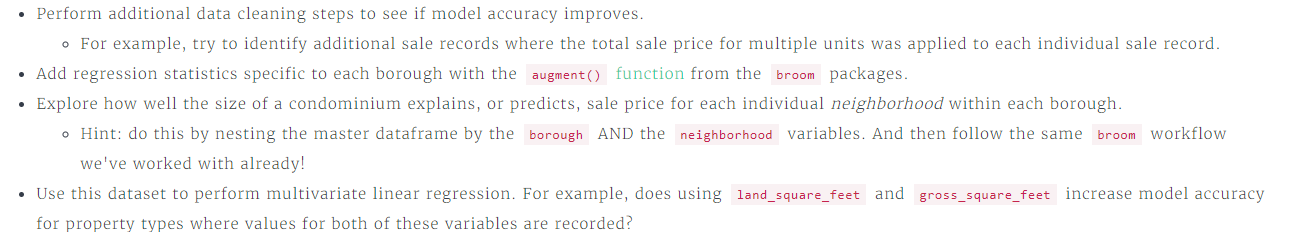

And here are a few ideas to consider if we'd like to adapt the workflow of this  Project to a dataset of our choosing:

Search for a real estate dataset in the city or country where we reside and attempt to predict/explain sale price based on size, or a different quantitative variable. Or, if we are a renter, consider predicting rental prices.